In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
Datos= pd.read_csv('./winequality-red.csv')

In [6]:
Datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
Datos.shape

(1599, 12)

In [9]:
Datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
Datos.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

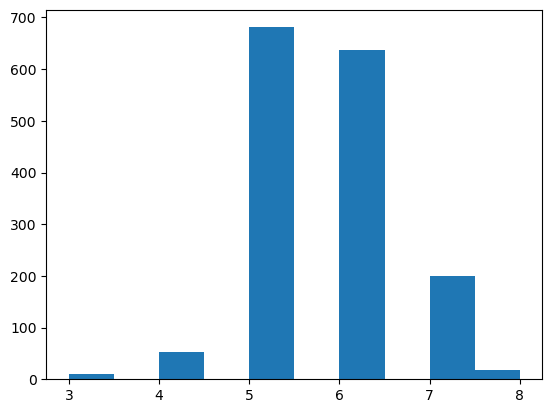

In [16]:
plt.hist(Datos.quality)

In [22]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","density","pH","sulphates","alcohol"]
target_col = ['quality']

In [23]:
predictors = Datos[predictors_col]
target = Datos[target_col]

In [24]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2


In [25]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [32]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,-0.021946,0.070377,0.051658,-0.069408
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.148506,-0.196648,1.000000,0.093595
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.496180,0.205633,0.093595,1.000000


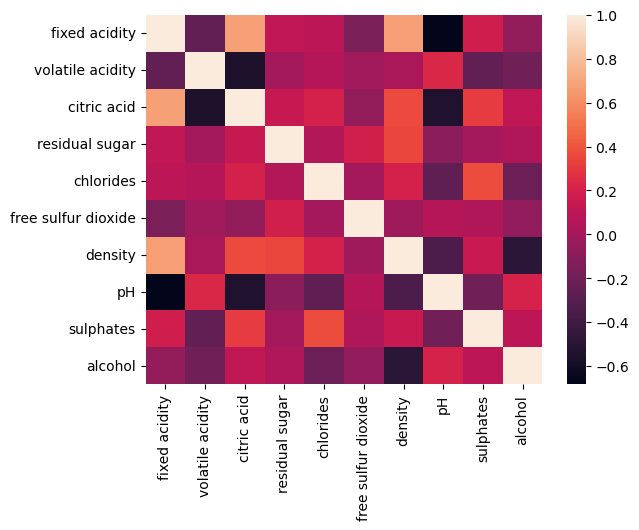

In [28]:
sns.heatmap(corr)
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [30]:
tree = DecisionTreeClassifier()

In [31]:
arbol = tree.fit(X_train, y_train)

[Text(0.43986061688001526, 0.9761904761904762, 'x[9] <= 10.525\ngini = 0.644\nsamples = 1199\nvalue = [8, 42, 500, 487, 150, 12]'),
 Text(0.19092263326327857, 0.9285714285714286, 'x[8] <= 0.535\ngini = 0.542\nsamples = 725\nvalue = [5, 27, 423, 246, 24, 0]'),
 Text(0.03190676346962171, 0.8809523809523809, 'x[1] <= 0.335\ngini = 0.369\nsamples = 173\nvalue = [2, 13, 135, 22, 1, 0]'),
 Text(0.016813144822315627, 0.8333333333333334, 'x[2] <= 0.43\ngini = 0.54\nsamples = 10\nvalue = [0, 1, 3, 6, 0, 0]'),
 Text(0.013756209400076424, 0.7857142857142857, 'x[8] <= 0.485\ngini = 0.56\nsamples = 5\nvalue = [0, 1, 3, 1, 0, 0]'),
 Text(0.010699273977837218, 0.7380952380952381, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.016813144822315627, 0.7380952380952381, 'x[9] <= 9.4\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(0.013756209400076424, 0.6904761904761905, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.019870080244554833, 0.6904761904761905, '

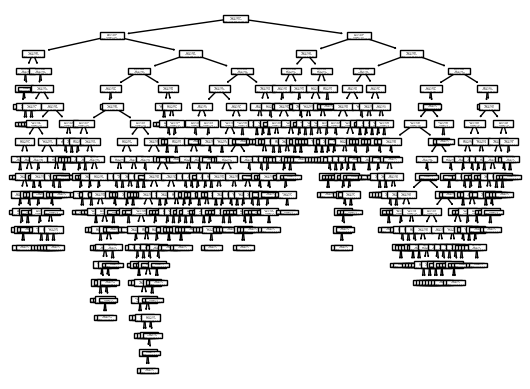

In [37]:
plot_tree(arbol)

In [34]:
predicciones = arbol.predict(X_test)

In [35]:
predicciones

array([7, 5, 5, 5, 6, 5, 6, 7, 5, 7, 5, 6, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6,
       7, 5, 6, 5, 5, 4, 5, 7, 6, 4, 5, 6, 5, 5, 6, 6, 5, 7, 5, 5, 6, 6,
       5, 6, 6, 8, 6, 6, 5, 5, 7, 5, 7, 5, 5, 6, 7, 5, 5, 5, 5, 4, 7, 7,
       6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 5, 5, 6, 7, 6, 6, 5, 6, 5, 6, 6,
       7, 6, 5, 6, 7, 6, 6, 6, 6, 5, 6, 5, 4, 6, 5, 5, 7, 7, 6, 6, 5, 8,
       5, 6, 6, 5, 6, 5, 6, 7, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6,
       5, 7, 6, 5, 7, 5, 6, 7, 6, 5, 5, 6, 7, 4, 6, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 4, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 7,
       5, 5, 6, 6, 5, 6, 5, 6, 7, 5, 6, 5, 6, 5, 5, 6, 7, 5, 6, 5, 5, 7,
       6, 5, 7, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 6,
       5, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5, 5, 7, 6, 6, 6, 6, 6, 5, 6, 7, 5,
       5, 5, 6, 7, 5, 4, 5, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 5, 5, 5, 7, 4,
       7, 7, 5, 5, 6, 6, 5, 5, 5, 6, 5, 7, 5, 5, 5,

In [36]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,4,5,6,7,8
Actual,,,,,
3,0,0,2,0,0
4,3,6,1,1,0
5,8,116,51,6,0
6,0,51,78,22,0
7,0,4,21,22,2
8,0,0,3,3,0


In [39]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.5475

In [43]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.27      0.27      0.27        11
           5       0.66      0.64      0.65       181
           6       0.50      0.52      0.51       151
           7       0.41      0.45      0.43        49
           8       0.00      0.00      0.00         6

    accuracy                           0.55       400
   macro avg       0.31      0.31      0.31       400
weighted avg       0.54      0.55      0.54       400



C:\Users\DANIEL-PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DANIEL-PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DANIEL-PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


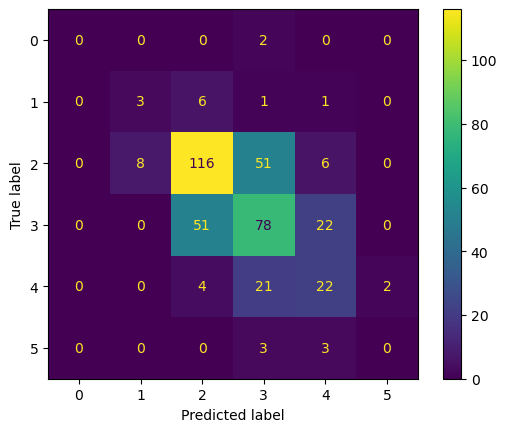

In [47]:
cm=confusion_matrix(y_test,predicciones)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()